# 冰與火之歌角色生存預測



## About Dataset

Game of Thrones is a hit fantasy tv show based on the equally famous book series "A Song of Fire and Ice" by George RR Martin. The show is well known for its vastly complicated political landscape, large number of characters, and its frequent character deaths.
       
we have character-deaths.csv from Erin Pierce and Ben Kahle. This dataset was created as a part of their Bayesian Survival Analysis.       
  

    

>- 本次作業為根據角色資訊來預測角色是否死亡 ，資料集character-deaths.csv在以下網址：
>- https://www.kaggle.com/mylesoneill/game-of-thrones

>- HW1 Kaggle 競賽網址：
>- https://www.kaggle.com/t/94d5024975a943f0126e8a26060451a4
 
  




## 1. 讀取資料

#### 資料欄位說明：
   >- Name：
   >- Allegiances：應該是忠於什麼陣營的意思
   >- Death Year：角色死亡年
   >- Book of Death：角色死亡集數
   >- Death Chapter：角色死亡章節
   >- Book Intro Chapter：章節人物介绍於何章
   >- Gender： 1 is male, 0 is female
   >- Nobility：1 is nobel, 0 is a commoner
   >- GoT：Appeared in first book
   >- CoK：Appeared in second book
   >- SoS：Appeared in third book
   >- FfC：Appeared in fourth book
   >- DwD：Appeared in fifth book

In [1]:
import pandas as pd

# 主要使用 character-deaths.csv這份資料-->已將其分為train, test兩份檔案
train = pd.read_csv("train.csv", header=0, encoding='utf-8')
test = pd.read_csv("test.csv", header=0, encoding='utf-8')

In [2]:
train.head()
# 觀察資料的欄位和資料型態

,Character,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,155,Creighton Longbough,None,NaN,NaN,NaN,4.0,1,0,0,0,0,1,0
1,362,Howd Wanderer,Wildling,NaN,NaN,NaN,58.0,1,1,0,0,0,0,1
2,868,Watt,Night's Watch,299.0,3.0,75.0,69.0,1,0,0,0,1,0,0
3,101,Borcas,Night's Watch,NaN,NaN,NaN,48.0,1,0,1,0,0,0,0
4,199,Donnis,House Stark,NaN,NaN,NaN,7.0,1,0,1,0,0,0,0


## 2. 資料前處理






In [3]:
train.isnull().sum()  

#檢查各個欄位是否有缺值--> Book Intro Chapter有缺值

Character               0
Name                    0
Allegiances             0
Death Year            444
Book of Death         442
Death Chapter         448
Book Intro Chapter     11
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64

### 2-1 把空值以0替代
#### 將Book Intro Chapter中的NAN先以0來填補(代表沒出現)

In [4]:
train.loc[train['Book Intro Chapter'].isnull(),'Book Intro Chapter']=0
test.loc[test['Book Intro Chapter'].isnull(),'Book Intro Chapter']=0

#  把空值以0替代

In [5]:
train.isnull().sum()
# 再次檢查，資料基本上都沒有空值了(Death Year, Book of Death, Death Chapter不會直接使用故暫時忽略)

Character               0
Name                    0
Allegiances             0
Death Year            444
Book of Death         442
Death Chapter         448
Book Intro Chapter      0
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64


### 2-2 Death Year , Book of Death , Death Chapter三個欄位取Death Chapter來做預測
#### 建立新欄位名為Death，將Death Chapter有數值的那筆資料的Death設為1 (有死掉)，沒有值就設為0(沒有死)

 

In [6]:
train['Death']=''
# 有掛掉的數量
train['Death Chapter'].notnull().sum()
#將死掉的欄位替換為1
train.loc[train['Death Chapter'].notnull(),'Death']=1  # 死掉了
train.loc[train['Death Chapter'].isnull(),'Death']=0   # 沒有死
train.head()


,Character,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Death
0,155,Creighton Longbough,None,NaN,NaN,NaN,4.0,1,0,0,0,0,1,0,0
1,362,Howd Wanderer,Wildling,NaN,NaN,NaN,58.0,1,1,0,0,0,0,1,0
2,868,Watt,Night's Watch,299.0,3.0,75.0,69.0,1,0,0,0,1,0,0,1
3,101,Borcas,Night's Watch,NaN,NaN,NaN,48.0,1,0,1,0,0,0,0,0
4,199,Donnis,House Stark,NaN,NaN,NaN,7.0,1,0,1,0,0,0,0,0


### 2-3 將Allegiances轉成dummy特徵
(Allegiances包含有幾種分類就會變成幾個特徵，值是0或1，本來的資料集就會再增加約20種特徵)



In [7]:
train = pd.get_dummies(train, columns=['Allegiances'])
test = pd.get_dummies(test, columns=['Allegiances'])

In [8]:
train.head()
# 可發現由Allegiances衍生多出很多欄位

,Character,Name,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,...,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_None,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,155,Creighton Longbough,NaN,NaN,NaN,4.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,362,Howd Wanderer,NaN,NaN,NaN,58.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,868,Watt,299.0,3.0,75.0,69.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,101,Borcas,NaN,NaN,NaN,48.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,199,Donnis,NaN,NaN,NaN,7.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 標準化(後來發現無法改善模型)
我覺得Book Intro Chapter要做標準化，因為其他欄位都是0/1的格式，這個欄位的數值影響會被放大
#### 此欄未移除後可提升訓練accuracy，但對預測測試資料沒有幫助

In [9]:
'''
max_intro = train["Book Intro Chapter"].max() # 最大值
min_intro = train["Book Intro Chapter"].min() # 最小值

train["intro times"] = (train["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max
train["intro times"] = (train["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max

max_intro = test["Book Intro Chapter"].max() # 最大值
min_intro = test["Book Intro Chapter"].min() # 最小值

test["intro times"] = (test["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max
test["intro times"] = (test["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max
'''

'\nmax_intro = train["Book Intro Chapter"].max() # 最大值\nmin_intro = train["Book Intro Chapter"].min() # 最小值\n\ntrain["intro times"] = (train["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max\ntrain["intro times"] = (train["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max\n\nmax_intro = test["Book Intro Chapter"].max() # 最大值\nmin_intro = test["Book Intro Chapter"].min() # 最小值\n\ntest["intro times"] = (test["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max\ntest["intro times"] = (test["Book Intro Chapter"] - min_intro) / (max_intro-min_intro) # min-max\n'

### 特徵選取
透過卡方檢定的P-value來確認要不要拒絕虛無假設(H0)
p值大於0.05，就無法拒絕

In [10]:

'''
from  scipy.stats import chi2_contingency # 引用chi2_contingency
import numpy as np # 引用numpy

kf_data = np.array([train['Gender'], train['Death']])
kf = chi2_contingency(kf_data)
print(kf)
'''

"\nfrom  scipy.stats import chi2_contingency # 引用chi2_contingency\nimport numpy as np # 引用numpy\n\nkf_data = np.array([train['Gender'], train['Death']])\nkf = chi2_contingency(kf_data)\nprint(kf)\n"

### 2-4 亂數拆成訓練集與測試集
>-  這裡不可以把test.csv放進來訓練
>-  訓練集75%
>-  測試集25% (y==>Death, 模型要預測Death欄位的值)

In [11]:
from sklearn.model_selection import train_test_split

# 若是要分割資料為train, val，用train_test_split()
y = train['Death'].values # 預測用的label
x = train.drop('Name',axis=1).drop('Death',axis=1).drop('Death Year',axis=1).drop('Book of Death',axis=1).drop('Death Chapter',axis=1).values
#刪除沒有要使用到的欄位 
x_train,x_test,y_train,y_test = train_test_split(x.astype(int), y.astype(int), train_size=0.75)


##  3. 建立分類模型
**使用scikit-learn的DecisionTreeClassifier進行預測**
>- 決策樹參數簡介(可調整決策樹參數以增加Accuracy):**
>- https://blog.csdn.net/TeFuirnever/article/details/99656571

**適合用於小樣本數、屬性不多時的參數調整:**
>- criterion:（default = gini）可以設為gini或是entropy
>- max_depth:決策樹深度
>- min_samples_leaf:每個節點需要的最小樣本數
>- min_impurity_split:（default = 1e-7）如果小於此門檻值，就不再作分枝


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=28,min_samples_leaf=2,random_state=10)
ice_fire_model = clf.fit(x_train, y_train)# 建立分類器ice_fire_model


   
## 4. 訓練結果
>- 做出Confusion Matrix
>- 計算Precision, Recall, Accuracy 



In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_test_predicted = ice_fire_model.predict(x_test)# 使用從資料集中分割出來的test做出來的 預測結果

                                     # 真實類別   預測結果
#print('precision: ',precision_score(y_test, y_test_predicted))
#print('recall: ',recall_score(y_test, y_test_predicted))
#print('accuracy: ',accuracy_score(y_test, y_test_predicted))

print(confusion_matrix(y_test, y_test_predicted))
print(classification_report(y_test, y_test_predicted))

[[91 20]
 [30 31]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       111
           1       0.61      0.51      0.55        61

    accuracy                           0.71       172
   macro avg       0.68      0.66      0.67       172
weighted avg       0.70      0.71      0.70       172



## 5. 預測test.csv的角色生死
>- test.csv就是另一份沒標籤的資料

In [14]:
test_X = test.drop('Name',axis=1)

# 預測結果
predicted_death =  ice_fire_model.predict(test_X)

C:\Users\fff\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [15]:
# 讀取test.csv，輸出結果至test.csv

results = {'Character': test['Character'],   #輸出共有兩行，第一行是角色編號，第二行是(預測結果)是否死亡
           'Death': predicted_death}

submission = pd.DataFrame(results)

submission.to_csv("submission.csv", index=False, header=1)

## 6. 產出決策樹的圖

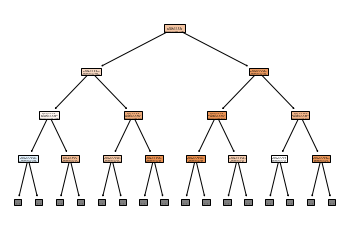

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

plt.figure()  #開啟一個畫布
tree.plot_tree(ice_fire_model, max_depth=3, filled=True) 
plt.show() 
plt.savefig("tree.png") # 畫出來的圖怪怪的，所以改用下面另一種方法

### 提示:
 **GraphViz's executables not found**
>- 1. 要先下載一個zip檔案
>- 2. conda install graphviz:
>- https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4

In [17]:
import graphviz
from six import StringIO  
import pydotplus 

dotfile = StringIO() 
tree.export_graphviz(ice_fire_model, out_file=dotfile,
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                     special_characters=True) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("my_tree.png")

print("已儲存my_tree.png")

已儲存my_tree.png
